# Info/CS 4300: Language and Information

## SVD CLASS DEMO RECREATION FOR ROCKTAILS


In [2]:
from __future__ import print_function
import numpy as np
import json

## Load the data

In [4]:
with open('../app/static/drinks.json', 'r') as infile:  
    jsonData = json.load(infile)
    drinklst = jsonData['drinks']
    
    for drink in drinklst:
        drink['ingredients'] = ' '.join(drink['ingredients'])
        drink['categories'] = ' '.join(drink['categories'])
#         drink['reviews'] = ' '.join(drink['reviews'])
    documents = [
        (x['name'],
         x['categories'],
         x['ingredients'])
                for x in drinklst]
    np.random.shuffle(documents)

In [5]:

print("Loaded {} documents".format(len(documents)))
print("Here is one of them:")
print(documents[0])


Loaded 2588 documents
Here is one of them:
('Cherry Vodka Sour', '', '3 fluid ounces vodka 3 fluid ounces sweet and sour mix 1 tablespoon cherry grenadine syrup')


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = .7,
                            min_df = 75)
my_matrix = vectorizer.fit_transform([x[2] for x in documents]).transpose()

/Users/nate/Downloads/assignment5/venv/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1039: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [8]:
print(type(my_matrix))
print(my_matrix.shape)

<class 'scipy.sparse.csc.csc_matrix'>
(91, 2588)


In [9]:
from scipy.sparse.linalg import svds
u, s, v_trans = svds(my_matrix, k=70)

In [10]:

print(u.shape)
print(s.shape)
print(v_trans.shape)

(91, 70)
(70,)
(70, 2588)


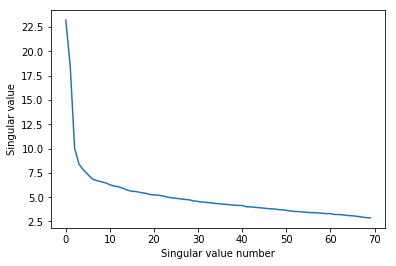

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [12]:
words_compressed, _, docs_compressed = svds(my_matrix, k=40)
docs_compressed = docs_compressed.transpose()

In [13]:
print(words_compressed.shape)
print(docs_compressed.shape)

(91, 40)
(2588, 40)


In [14]:
word_to_index = vectorizer.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(91, 40)


In [15]:
#row normalize
from sklearn.preprocessing import normalize
words_compressed = normalize(words_compressed, axis = 1)

In [16]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [17]:
closest_words("sour")


[('mix', 0.9358490140888569),
 ('sweet', 0.8012120084832467),
 ('taste', 0.1868238847324166),
 ('slice', 0.15145119321329062),
 ('amaretto', 0.14619059645344287),
 ('apple', 0.1430619403927045),
 ('wedge', 0.1256168097802844),
 ('cinnamon', 0.11386501863030789),
 ('tequila', 0.11088978822049161),
 ('grenadine', 0.1076931699028933)]

In [18]:
print(list(word_to_index))

['tsp', 'rum', '12', 'ounce', 'light', 'egg', 'concentrate', 'twist', 'grapefruit', 'tablespoons', 'sec', 'syrup', 'wine', 'sugar', 'teaspoon', 'crushed', 'cup', 'angostura', 'ounces', 'optional', 'ginger', 'chilled', 'dry', 'needed', 'gin', 'blanco', 'cinnamon', 'wedge', 'mr', 'bottle', 'orange', 'oz', 'flavored', 'schnapps', 'coconut', 'irish', 'cubes', 'sour', 'tablespoon', 'milk', 'lemon', 'raspberry', 'liqueur', 'peach', 'triple', 'old', 'whiskey', 'jigger', 'brandy', 'juice', 'salt', 'lime', 'bourbon', 'tequila', 'vermouth', 'creme', 'dark', 'ice', 'fresh', 'powdered', 'white', 'cherry', 'cranberry', 'leaves', 'coffee', 'fluid', 'mint', 'amaretto', 'apple', 'simple', 'taste', 'frozen', 'bitters', 'slice', 'vanilla', 'grenadine', 'carbonated', 'water', 'ground', 'dash', 'boston', 'sweet', 'soda', 'cream', 'vodka', 'cups', 'maraschino', 'cacao', 'mix', 'garnish', 'pineapple']


In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [20]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(subset)
print(projected_docs.shape)

(2588, 40)
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2588
[t-SNE] Computed conditional probabilities for sample 2000 / 2588
[t-SNE] Computed conditional probabilities for sample 2588 / 2588
[t-SNE] Mean sigma: 0.044817
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.420381
[t-SNE] Error after 275 iterations: 1.420381
(2588, 2)


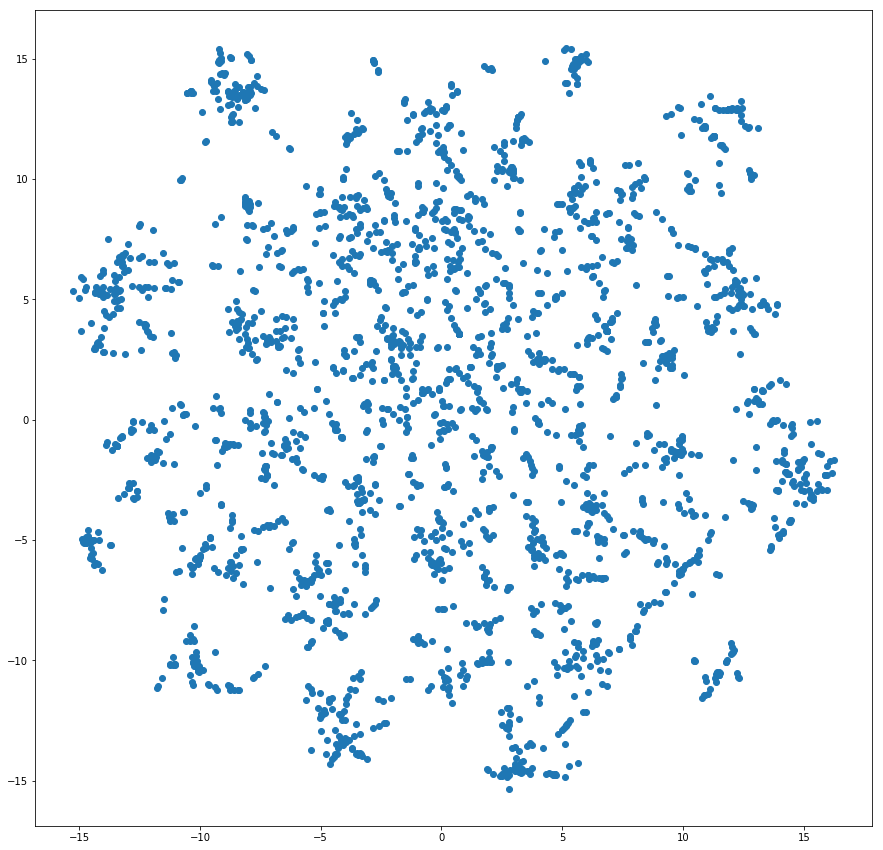

In [21]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [22]:
from collections import Counter
t = [x[1] for x in documents]
cats = Counter(t)
print(cats)

Counter({'': 2121, 'winter': 64, 'afternoon': 32, 'night': 26, 'easter': 25, 'summer': 19, 'morning': 19, 'spring': 16, 'fall thanksgiving': 15, 'dinner party graduation': 14, 'st pattys': 13, 'winter st pattys': 13, 'thanksgiving': 11, 'halloween': 11, 'fall': 9, 'spring summer': 9, 'winter christmas': 9, 'winter morning': 8, 'party sports': 8, 'dinner party': 8, 'winter birthday': 8, 'winter thanksgiving': 7, 'morning graduation new years birthday': 7, 'spring morning': 6, 'winter night': 5, 'birthday': 5, 'sports': 4, 'spring summer afternoon': 4, 'spring sports': 4, 'party': 3, 'graduation': 3, 'winter birthday christmas': 3, 'morning afternoon': 3, 'spring afternoon': 3, 'graduation new years birthday': 2, 'winter halloween': 2, 'winter easter': 2, 'fall winter': 2, 'afternoon party new years': 2, 'morning afternoon graduation': 2, 'spring summer sports': 2, 'spring easter': 2, 'summer afternoon': 2, 'night easter': 2, 'morning graduation new years': 2, 'afternoon sports': 2, 'win

In [23]:
from collections import defaultdict
cat_to_color = defaultdict(lambda: 'k')
cat_to_color.update({"winter":'g',
               "spring":'c',
               "summer":'r',
               "fall": "b"})
color_to_project = defaultdict(list)
for i in range(projected_docs.shape[0]):
    color_to_project[cat_to_color[''.join(documents[i][1])]].append(i)

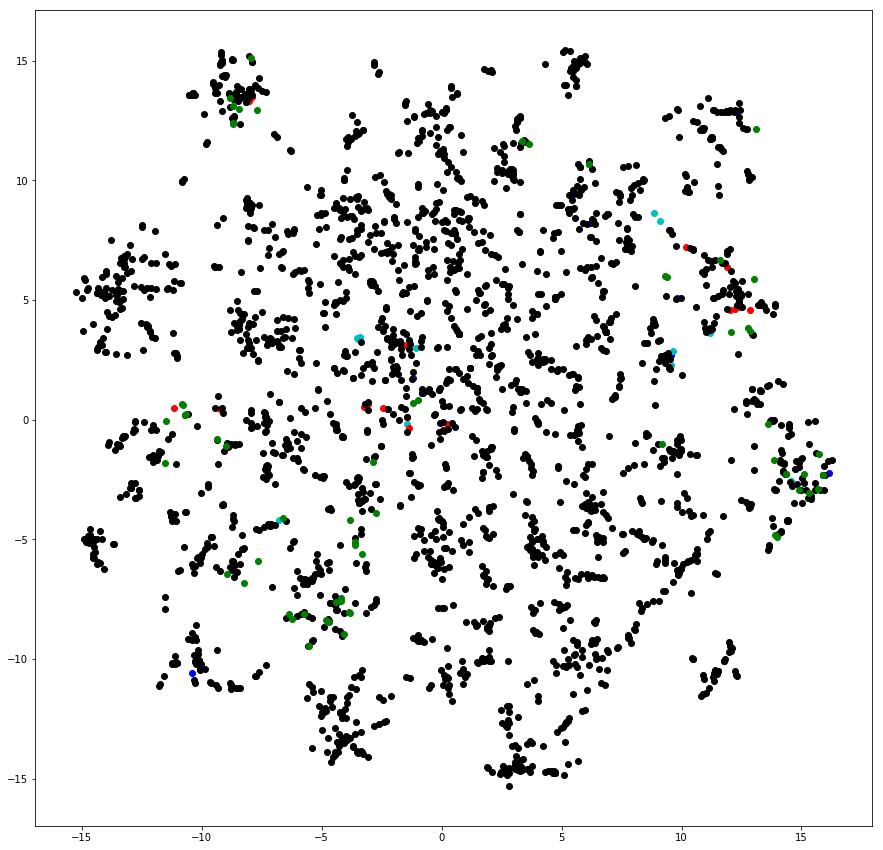

In [24]:
plt.figure(figsize=(15,15))
for color, indices in color_to_project.items():
    indices = np.array(indices)
    plt.scatter(projected_docs[indices,0], projected_docs[indices,1],
                color = color)
plt.show()

In [25]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_drinks(project_index_in, k = 5):
    sims = docs_compressed.dot(docs_compressed[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(documents[i][0],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [26]:
drinkSimilarByName = dict()

for i in range(0, len(documents)):
    name = documents[i][0]
    drinkSimilarByName[name] = []
    for title, score in closest_drinks(i):
        if (score > 0.70):
            drinkSimilarByName[name].append({'name':title,'score':score})

print(drinkSimilarByName['Saronno'])


/Users/nate/Downloads/assignment5/venv/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


[{'score': 0.8345496290303538, 'name': 'Scooter'}, {'score': 0.8254201003299215, 'name': 'God Child'}, {'score': 0.7819022105357163, 'name': 'Amaretto Shake'}, {'score': 0.7067213402314922, 'name': 'Tea Saronno'}]


In [27]:
with open('../app/static/related-drinks.json', 'w') as outfile:  
    json.dump(drinkSimilarByName, outfile)


In [28]:
drinkByName = dict()

with open('../app/static/drinks.json', 'r') as infile:  
    jsonData = json.load(infile)
    drinklst = jsonData['drinks']

for drink in drinklst:
    drinkByName[drink['name']] = drink  

In [29]:
for i in range(5):
    print(documents[i][0])
    print(documents[i][2])
    close = closest_drinks(i)
    for title, score in close:
        if(score > 0.7):
            print("{}:{:.3f}".format(title[:40], score))
            print(drinkByName[title]['ingredients'])
        print()
            
        
    print()
    print()

Cherry Vodka Sour
3 fluid ounces vodka 3 fluid ounces sweet and sour mix 1 tablespoon cherry grenadine syrup
Lianna's Cosmopolitan:0.857
['2 fluid ounces vodka', '1 tablespoon triple sec liqueur', '2 fluid ounces sweet and sour mix', '1 1/2 fluid ounces grenadine syrup', '1 maraschino cherry, garnish']

Grenadine Half-Mast:0.700
['1 cup ice', '6 fluid ounces sweet and sour mix', '3 fluid ounces tequila', '1 1/2 fluid ounces grenadine syrup', '1 fluid ounce triple sec (orange-flavored liqueur)']






Saints and Strangers Cocktail
2 fluid ounces vodka 2 fluid ounces freshly squeezed grapefruit juice 1 1/2 fluid ounces freshly squeezed pomegranate juice 1/2 fluid ounce sweet French vermouth 1/2 ounce cream of balsamic (balsamic glaze) 1/4 fluid ounce cold-pressed cranberry juice 1/8 teaspoon freshly ground pink peppercorns ice cubes 1 pinch freshly grated orange zest







His-n-Hers Cocktails
His Ingredients: 2 fluid ounces vanilla vodka 1 fluid ounce hazelnut liqueur 1/2 cup ice cubes

In [30]:
jsondata = {}
jsondata['drinks'] = []
for drink in drinkByName.values():
    try:
        ing = [(b +" " + a) for (a,b) in drink['ingredients'] if a != ""]
    except ValueError:
        ing = [a for a in drink['ingredients'] if a != ""]
        
    if 'instructions' in drink:
        drink['description'] = drink['instructions']
    
    jsondata['drinks'].append({
        'name' : drink['name'],
        'description' : drink['description'],
        'src' : drink['src'],
        'ingredients' : ing,
        'rating' : drink['rating'],
        'reviews' : drink.get('reviews', []),
        'categories' : drink.get('categories', []),
        'related' : drinkSimilarByName.get(drink['name'], [])
    })

In [31]:
with open('../app/static/drinks-with-related.json', 'w') as outfile:  
    json.dump(jsondata, outfile)